### Dataset
We will use Traffic Stops from Cincinnati City.

Data description:
This dataset captures all subjects of traffic stops involving motor vehicles. Time of incident, officer assignment, race/sex of stop subject, and outcome of the stop ("Action taken") are also included in this data. Individual traffic stops may populate multiple data rows to account for multiple subjects and multiple outcomes: "incident number" is the unique identifier for every one (1) traffic stop.

Filename: "Traffic\_Crash\_Reports_\_CPD_\_Aug2018.csv"

**Step 1:** Write Julia code to load this data into memory.

In [1]:
Pkg.add("CSV")
using CSV
data = CSV.read("Traffic_Crash_Reports__CPD__Aug2018.csv", delim=",", missingstring="N/A", rows_for_type_detect=2568)

,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGE,COMMUNITY_COUNCIL_NEIGHBORHOOD,CPD_NEIGHBORHOOD,CRASHDATE,CRASHLOCATION,CRASHSEVERITY,CRASHSEVERITYID,DATECRASHREPORTED,DAYOFWEEK,GENDER,INJURIES,INSTANCEID,LIGHTCONDITIONSPRIMARY,LOCALREPORTNO,MANNEROFCRASH,ROADCONDITIONSPRIMARY,ROADCONTOUR,ROADSURFACE,SNA_NEIGHBORHOOD,TYPEOFPERSON,WEATHER,ZIP
1,47XX READING RD,39.1721,84.4678,18-25,missing,missing,08/17/2018 04:30:00 PM +0000,01 - NOT AN INTERSECTION,3 - PROPERTY DAMAGE ONLY (PDO),3,08/17/2018 04:34:00 PM +0000,FRI,M - MALE,1 - NO INJURY / NONE REPORTED,BEB6A6E7-AAA9-4017-B4A1-9B24E903B92A,1 - DAYLIGHT,185011500,2 - REAR-END,01 - DRY,1 - STRAIGHT LEVEL,1 - CONCRETE,missing,D - DRIVER,1 - CLEAR,45237
2,29XX MONTANA AV,39.1489,84.5963,31-40,missing,missing,08/23/2018 01:50:00 PM +0000,01 - NOT AN INTERSECTION,2 - INJURY,2,08/23/2018 01:59:00 PM +0000,THU,M - MALE,1 - NO INJURY / NONE REPORTED,97ED05BD-41C8-48F9-B596-00616F1C906A,1 - DAYLIGHT,185011781,2 - REAR-END,01 - DRY,1 - STRAIGHT LEVEL,"2 - BLACKTOP, BITUMINOUS, ASPHALT",missing,D - DRIVER,1 - CLEAR,45211
3,39XX W LIBERTY ST,39.118,-84.578,26-30,WEST PRICE HILL,WEST PRICE HILL,08/10/2018 10:38:00 PM +0000,02 - FOUR-WAY INTERSECTION,2 - INJURY,2,08/10/2018 10:42:00 PM +0000,FRI,M - MALE,2 - POSSIBLE,52C0ECE6-D184-40F4-8168-2A96134C64C9,5 - DARK – ROADWAY NOT LIGHTED,185011134,6 - ANGLE,01 - DRY,2 - STRAIGHT GRADE,"2 - BLACKTOP, BITUMINOUS, ASPHALT",WEST PRICE HILL,D - DRIVER,1 - CLEAR,45205
4,29XX WASSON RD,39.1436,84.4347,41-50,missing,missing,08/27/2018 06:02:00 PM +0000,01 - NOT AN INTERSECTION,3 - PROPERTY DAMAGE ONLY (PDO),3,08/27/2018 06:03:00 PM +0000,MON,M - MALE,1 - NO INJURY / NONE REPORTED,936CCCE9-60E5-4E5F-8845-D842A20E2D5C,1 - DAYLIGHT,185011974,2 - REAR-END,01 - DRY,1 - STRAIGHT LEVEL,"2 - BLACKTOP, BITUMINOUS, ASPHALT",missing,D - DRIVER,1 - CLEAR,45208
5,S I75 AT 1-8 MM,39.1148,-84.5319,26-30,WEST END,WEST END,08/10/2018 12:15:00 PM +0000,01 - NOT AN INTERSECTION,3 - PROPERTY DAMAGE ONLY (PDO),3,08/10/2018 12:15:00 PM +0000,FRI,M - MALE,1 - NO INJURY / NONE REPORTED,C6A453AD-C765-442E-BDB8-17668B1B9157,1 - DAYLIGHT,185011098,2 - REAR-END,01 - DRY,1 - STRAIGHT LEVEL,"2 - BLACKTOP, BITUMINOUS, ASPHALT",QUEENSGATE,D - DRIVER,2 - CLOUDY,45214
6,56XX RIDGE AV,39.1751,-84.427,UNDER 18,PLEASANT RIDGE,PLEASANT RIDGE,08/15/2018 04:10:00 PM +0000,01 - NOT AN INTERSECTION,2 - INJURY,2,08/15/2018 04:12:00 PM +0000,WED,F - FEMALE,1 - NO INJURY / NONE REPORTED,73BC05E2-5812-4F62-9A8A-78629CA13D3F,1 - DAYLIGHT,185011359,2 - REAR-END,02 - WET,2 - STRAIGHT GRADE,"2 - BLACKTOP, BITUMINOUS, ASPHALT",PLEASANT RIDGE,O - OCCUPANT,4 - RAIN,45213
7,26XX FIRTREE CT,39.1744,-84.5459,26-30,NORTHSIDE,NORTHSIDE,08/11/2018 09:49:00 PM +0000,01 - NOT AN INTERSECTION,3 - PROPERTY DAMAGE ONLY (PDO),3,08/11/2018 09:51:00 PM +0000,SAT,M - MALE,1 - NO INJURY / NONE REPORTED,4FEAF61D-13A5-4BC6-BCAF-555796E848EE,9 - UNKNOWN,185011197,"8 - SIDESWIPE, OPPOSITE DIRECTION",01 - DRY,1 - STRAIGHT LEVEL,"2 - BLACKTOP, BITUMINOUS, ASPHALT",NORTHSIDE,D - DRIVER,1 - CLEAR,45223
8,50XX PADDOCK RD,39.1778,-84.4777,61-70,BOND HILL,BONDHILL,08/14/2018 09:55:00 AM +0000,01 - NOT AN INTERSECTION,3 - PROPERTY DAMAGE ONLY (PDO),3,08/14/2018 09:58:00 AM +0000,TUE,M - MALE,1 - NO INJURY / NONE REPORTED,769F8CD0-8E8A-4952-AE34-BD6569C1795F,1 - DAYLIGHT,185011287,6 - ANGLE,01 - DRY,1 - STRAIGHT LEVEL,"2 - BLACKTOP, BITUMINOUS, ASPHALT",BOND HILL,D - DRIVER,1 - CLEAR,45237
9,40XX HAMILTON AV,39.1583,-84.54,18-25,NORTHSIDE,NORTHSIDE,08/03/2018 01:46:00 PM +0000,01 - NOT AN INTERSECTION,2 - INJURY,2,08/03/2018 01:46:00 PM +0000,FRI,F - FEMALE,2 - POSSIBLE,07CFBF3A-276B-490F-AF8C-B54B68EA6C4F,1 - DAYLIGHT,185010761,2 - REAR-END,01 - DRY,1 - STRAIGHT LEVEL,"2 - BLACKTOP, BITUMINOUS, ASPHALT",NORTHSIDE,O - OCCUPANT,1 - CLEAR,45223
10,29XX VERNON PL,39.1344,-84.4998,51-60,AVONDALE,AVONDALE,08/28/2018 09:10:00 AM +0000,01 - NOT AN INTERSECTION,3 - PROPERTY DAMAGE ONLY (PDO),3,08/28/2018 09:30:00 AM +0000,TUE,M - MALE,1 - NO INJURY / N

INFO: Pkg operations are not possible on JuliaBox. Please use the "Packages" menu at the top of the main screen.


**Step 2:** What is the size of the data?

In [2]:
using DataFrames;
size(data)

(2567, 25)

**Step 3:** Create a new Dataframe by selecting the columns AGE, CRASHSEVERITYID, DAYOFWEEK, GENDER, INJURIES, LIGHTCONDITIONSPRIMARY, LOCALREPORTNO, MANNEROFCRASH, ROADSURFACE, WEATHER, ZIP

*From here on wards work with the new Dataframe.*

In [3]:
# New dataframe
data1 = data[:,[:AGE, :CRASHSEVERITYID, :DAYOFWEEK, :GENDER, :INJURIES, :LIGHTCONDITIONSPRIMARY, :LOCALREPORTNO, :MANNEROFCRASH, :ROADSURFACE, :WEATHER, :ZIP]]
head(data1)

,AGE,CRASHSEVERITYID,DAYOFWEEK,GENDER,INJURIES,LIGHTCONDITIONSPRIMARY,LOCALREPORTNO,MANNEROFCRASH,ROADSURFACE,WEATHER,ZIP
1,18-25,3,FRI,M - MALE,1 - NO INJURY / NONE REPORTED,1 - DAYLIGHT,185011500,2 - REAR-END,1 - CONCRETE,1 - CLEAR,45237
2,31-40,2,THU,M - MALE,1 - NO INJURY / NONE REPORTED,1 - DAYLIGHT,185011781,2 - REAR-END,"2 - BLACKTOP, BITUMINOUS, ASPHALT",1 - CLEAR,45211
3,26-30,2,FRI,M - MALE,2 - POSSIBLE,5 - DARK – ROADWAY NOT LIGHTED,185011134,6 - ANGLE,"2 - BLACKTOP, BITUMINOUS, ASPHALT",1 - CLEAR,45205
4,41-50,3,MON,M - MALE,1 - NO INJURY / NONE REPORTED,1 - DAYLIGHT,185011974,2 - REAR-END,"2 - BLACKTOP, BITUMINOUS, ASPHALT",1 - CLEAR,45208
5,26-30,3,FRI,M - MALE,1 - NO INJURY / NONE REPORTED,1 - DAYLIGHT,185011098,2 - REAR-END,"2 - BLACKTOP, BITUMINOUS, ASPHALT",2 - CLOUDY,45214
6,UNDER 18,2,WED,F - FEMALE,1 - NO INJURY / NONE REPORTED,1 - DAYLIGHT,185011359,2 - REAR-END,"2 - BLACKTOP, BITUMINOUS, ASPHALT",4 - RAIN,45213


**Step 4:** Using showcols, list the different element types in the new data frame. Also list the columns in which there are missing values.


In [4]:
using DataFrames;
showcols(data1)
#TODO list of columns 

,variable,eltype,nmissing,first,last
1,AGE,CategoricalArrays.CategoricalString{UInt32},0,18-25,UNKNOWN
2,CRASHSEVERITYID,Int64,0,3,3
3,DAYOFWEEK,CategoricalArrays.CategoricalString{UInt32},0,FRI,SAT
4,GENDER,CategoricalArrays.CategoricalString{UInt32},299,M - MALE,missing
5,INJURIES,CategoricalArrays.CategoricalString{UInt32},10,1 - NO INJURY / NONE REPORTED,missing
6,LIGHTCONDITIONSPRIMARY,CategoricalArrays.CategoricalString{UInt32},0,1 - DAYLIGHT,4 - DARK - LIGHTED ROADWAY
7,LOCALREPORTNO,CategoricalArrays.CategoricalString{UInt32},0,185011500,185011921
8,MANNEROFCRASH,CategoricalArrays.CategoricalString{UInt32},0,2 - REAR-END,1 - NOT COLLISION BETWEEN TWO MOTOR VEHICLES IN TRANSPORT
9,ROADSURFACE,CategoricalArrays.CategoricalString{UInt32},0,1 - CONCRETE,"2 - BLACKTOP, BITUMINOUS, ASPHALT"
10,WEATHER,CategoricalArrays.CategoricalString{UInt32},0,1 - CLEAR,1 - CLEAR


**Step 5:** Remove the rows in the missing values from the Dataframe. Comment on the number of rows that have been removed in this process.

In [5]:
# w_missing_data is dataframe cleaned dataframe without any missing values
w_missing_data = dropmissing(data1)
size(w_missing_data)
print(size(data1)[1]- size(w_missing_data)[1], " number of rows were removed")

**Step 6:** List the unique entries in the CRASHSEVERITY column

In [6]:
unique(data[:CRASHSEVERITY])

3-element Array{Union{Missings.Missing, String},1}:
 "3 - PROPERTY DAMAGE ONLY (PDO)"
 "2 - INJURY"                    
 "1 - FATAL INJURY"              

317 number of rows were removed

**Step 7:** Find out the different types of crashes in this data.

In [7]:
number_of_crashes = by(data, :CRASHSEVERITY, nrow)

,CRASHSEVERITY,x1
1,3 - PROPERTY DAMAGE ONLY (PDO),1916
2,2 - INJURY,646
3,1 - FATAL INJURY,5


**Step 8:** Find out the different types of WEATHERCONDITIONS in this data.

In [8]:
unique(w_missing_data[:WEATHER])

5-element Array{Union{Missings.Missing, String},1}:
 "1 - CLEAR"           
 "2 - CLOUDY"          
 "4 - RAIN"            
 "9 - OTHER/UNKNOWN"   
 "3 - FOG, SMOG, SMOKE"

**Step 9:** Determine the number of crashes happened in each of these weather conditions using by() function.

In [9]:
number_of_crashes = by(w_missing_data, :WEATHER, nrow)

,WEATHER,x1
1,1 - CLEAR,1519
2,2 - CLOUDY,402
3,4 - RAIN,321
4,9 - OTHER/UNKNOWN,7
5,"3 - FOG, SMOG, SMOKE",1


**Step 10:** Find out the different light conditions in this data.

In [10]:
unique(data[:LIGHTCONDITIONSPRIMARY])

8-element Array{Union{Missings.Missing, String},1}:
 "1 - DAYLIGHT"                       
 "5 - DARK – ROADWAY NOT LIGHTED"     
 "9 - UNKNOWN"                        
 "4 - DARK - LIGHTED ROADWAY"         
 "3 - DUSK"                           
 "6 - DARK – UNKNOWN ROADWAY LIGHTING"
 "8 - OTHER"                          
 "2 - DAWN"                           

**Step 11:** Determine the number of crashes happened in each of these weather conditions using by() function. What is the condition in which most crashes are reported?

In [11]:
number_of_crashes = by(w_missing_data, :LIGHTCONDITIONSPRIMARY, nrow)

,LIGHTCONDITIONSPRIMARY,x1
1,1 - DAYLIGHT,1793
2,5 - DARK – ROADWAY NOT LIGHTED,14
3,9 - UNKNOWN,4
4,4 - DARK - LIGHTED ROADWAY,363
5,6 - DARK – UNKNOWN ROADWAY LIGHTING,4
6,2 - DAWN,23
7,3 - DUSK,49


In [12]:
print("Most crashes were reported in Daylight condition i.e. 1793 accidents")

In [13]:
number_of_crashes = by(w_missing_data, :WEATHER, nrow)

,WEATHER,x1
1,1 - CLEAR,1519
2,2 - CLOUDY,402
3,4 - RAIN,321
4,9 - OTHER/UNKNOWN,7
5,"3 - FOG, SMOG, SMOKE",1


In [14]:
print("Most crashes were reported in Clear condition i.e. 1519 accidents")

**Step 12:** Determine the number of crashes happened in each combination of weather and light conditions using by() function. State your observations.

In [15]:
a=unique(data[:WEATHER])
size(a)
b=unique(data[:LIGHTCONDITIONSPRIMARY]) 
size(b)
by(data, collect(Base.product(a ,b)), nrow)

LoadError: [91mArgumentError: idx[1] has type Array{Tuple{Union{Missings.Missing, String},Union{Missings.Missing, String}},2}; DataFrame only supports indexing columns with integers, symbols or boolean vectors[39m

Most crashes were reported in Daylight condition i.e. 1793 accidentsMost crashes were reported in Clear condition i.e. 1519 accidents

**Step 12:** How many ZIP codes are covered in this data.

In [16]:
a = size(unique(w_missing_data[:ZIP]))

(33,)

In [36]:
print("Observation: There are total 33 zip codes covered in this data.")

Observation: There are total 33 zip codes covered in this data.

**Step 13:** Plot a bar graph showing the number of accidents in each of the ZIP codes

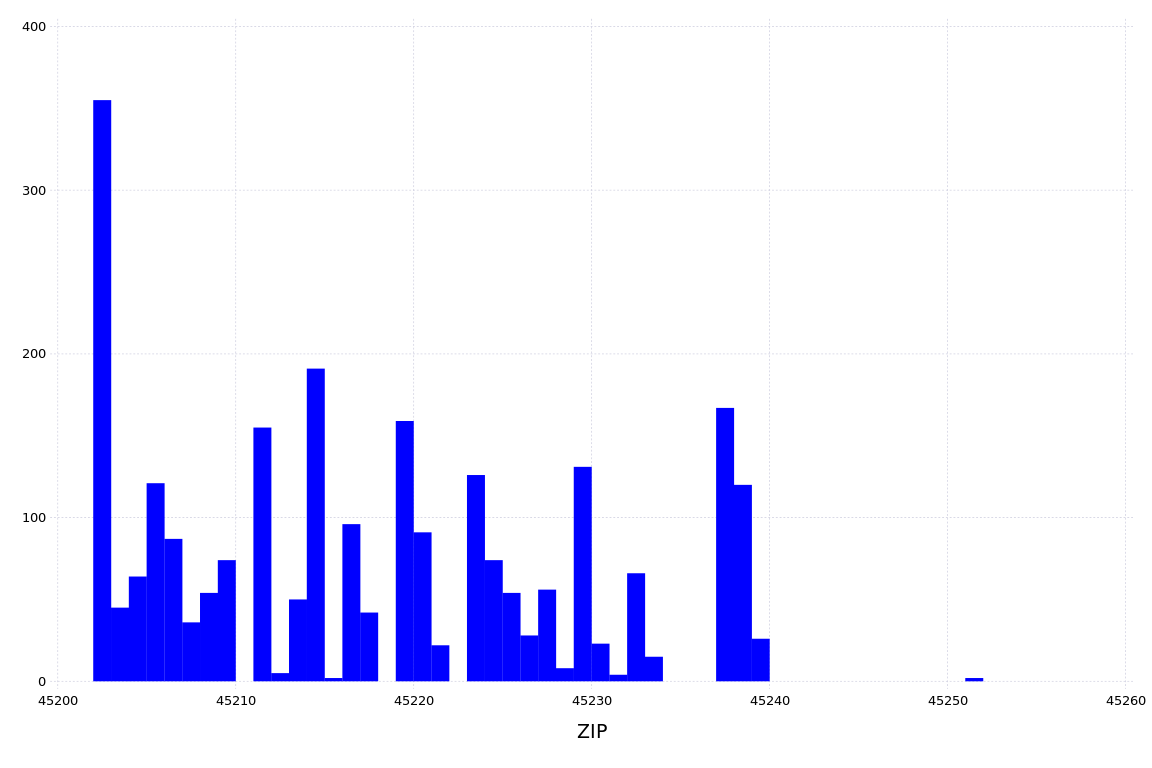

false

INFO: Pkg operations are not possible on JuliaBox. Please use the "Packages" menu at the top of the main screen.
INFO: Pkg operations are not possible on JuliaBox. Please use the "Packages" menu at the top of the main screen.


In [25]:
Pkg.add("Gadfly");
Pkg.add("Cairo");

using Gadfly, Cairo;

white_panel = Theme(panel_fill = colorant"white",
                    default_color= colorant"blue",
                    major_label_font_size=14pt,
                    minor_label_font_size=10pt,
                    major_label_color=colorant"black",
                    minor_label_color=colorant"black");

# df = by(data1, :ZIP, nrows)
# myplot = plot(df, x="ZIP", y="x1", Geom.bar, color="ZIP", white_panel)

myplot = plot(data1, x="ZIP", Geom.histogram, white_panel)
draw(PNG(12inch, 8inch), myplot)

**Step 14:** Draw a scatter plot between weather and light conditions. State your observations. Please use set_default_plot_size(12inch, 8inch) function to adjust the figure size as needed for visibility.

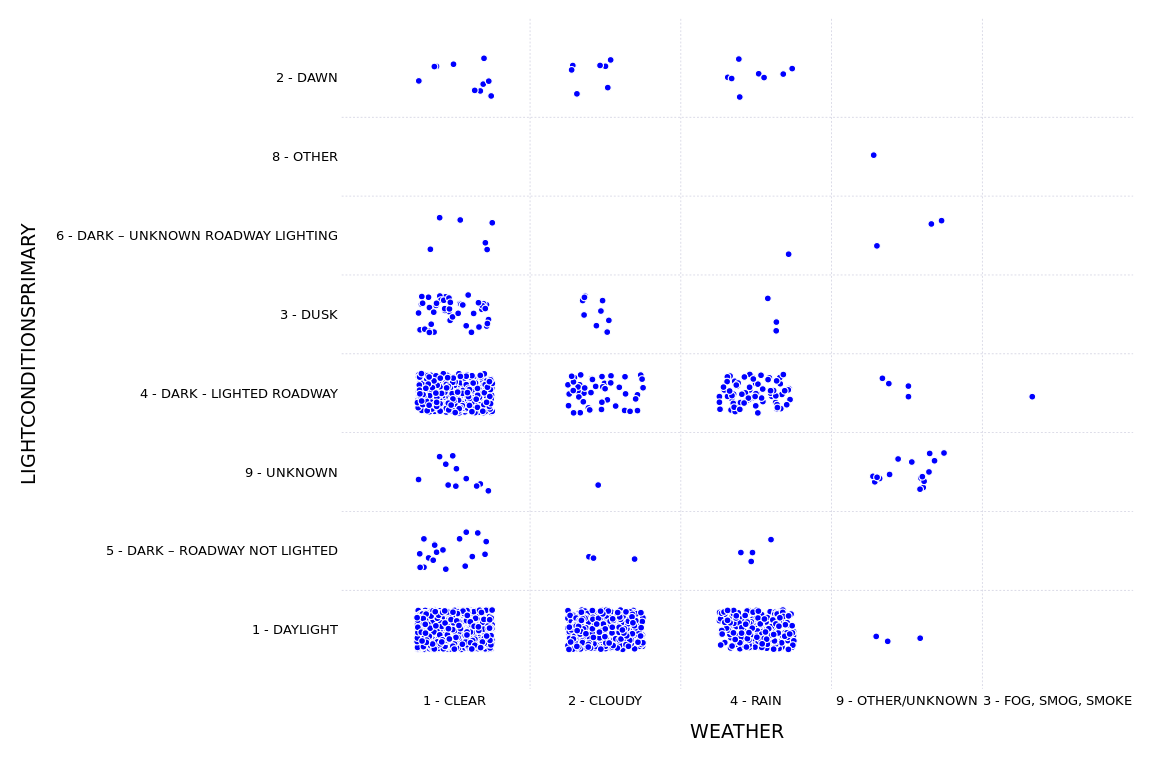

Observation: The categorical data shows that the most accidents occur during Daylight and Dark light conditions. Furthermore, weather conditions like clear, rainy and cloudy are causes of most crashes. 

In [37]:
myplot = Gadfly.plot(data, x=:WEATHER,           y=:LIGHTCONDITIONSPRIMARY,
                    Stat.x_jitter(range=0.5, seed=10),
                    Stat.y_jitter(range=0.5, seed=20),
                    Geom.point, white_panel);
draw(PNG(12inch, 8inch), myplot)
print("Observation: The categorical data shows that the most accidents occur during Daylight and Dark light conditions. Furthermore, weather conditions like clear, rainy and cloudy are causes of most crashes. ")

**Step 15:** Make a plot to view the number of crashes on different days of the week. On which day of the week fewer crashes happen? On which day of the week more crashes happen?

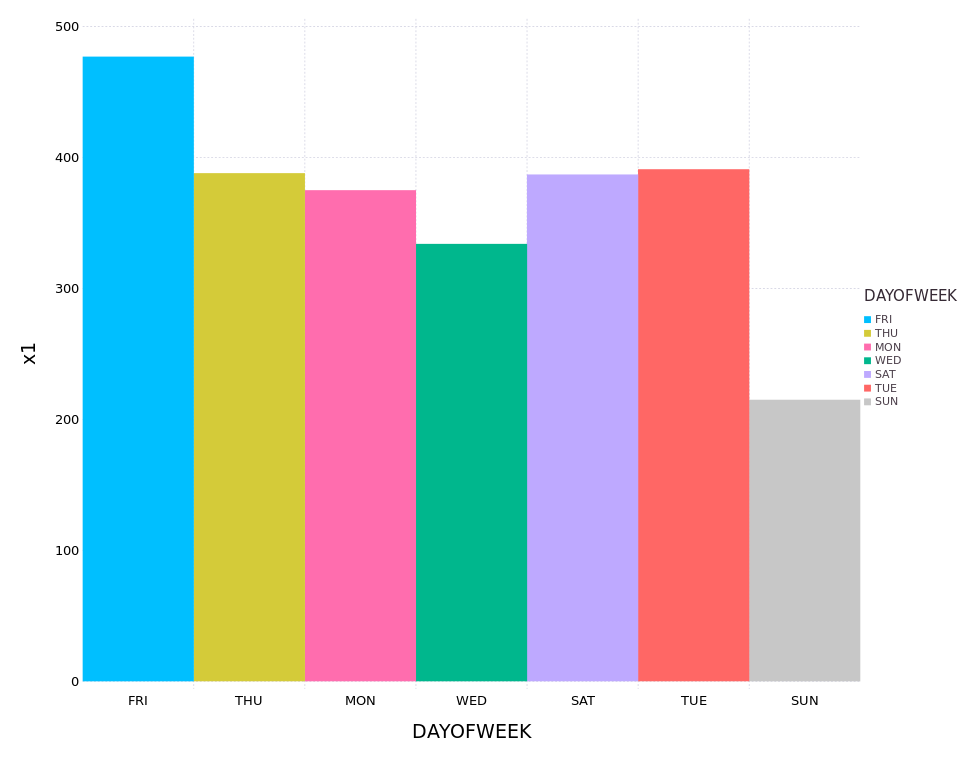

Observation: Sunday is the day of the Week when fewst crashes happen and friday is the day when most crashes happen.

In [38]:
df = by(data1, :DAYOFWEEK, nrow)
myplot = plot(df, x="DAYOFWEEK", y ="x1", Geom.bar, color="DAYOFWEEK" ,white_panel )
draw(PNG(10inch, 8inch), myplot)
print("Observation: Sunday is the day of the Week when fewst crashes happen and friday is the day when most crashes happen.")

**Step 16:** Make a plot to view the number of crashes reported per age-group. State your observations. State your observations.

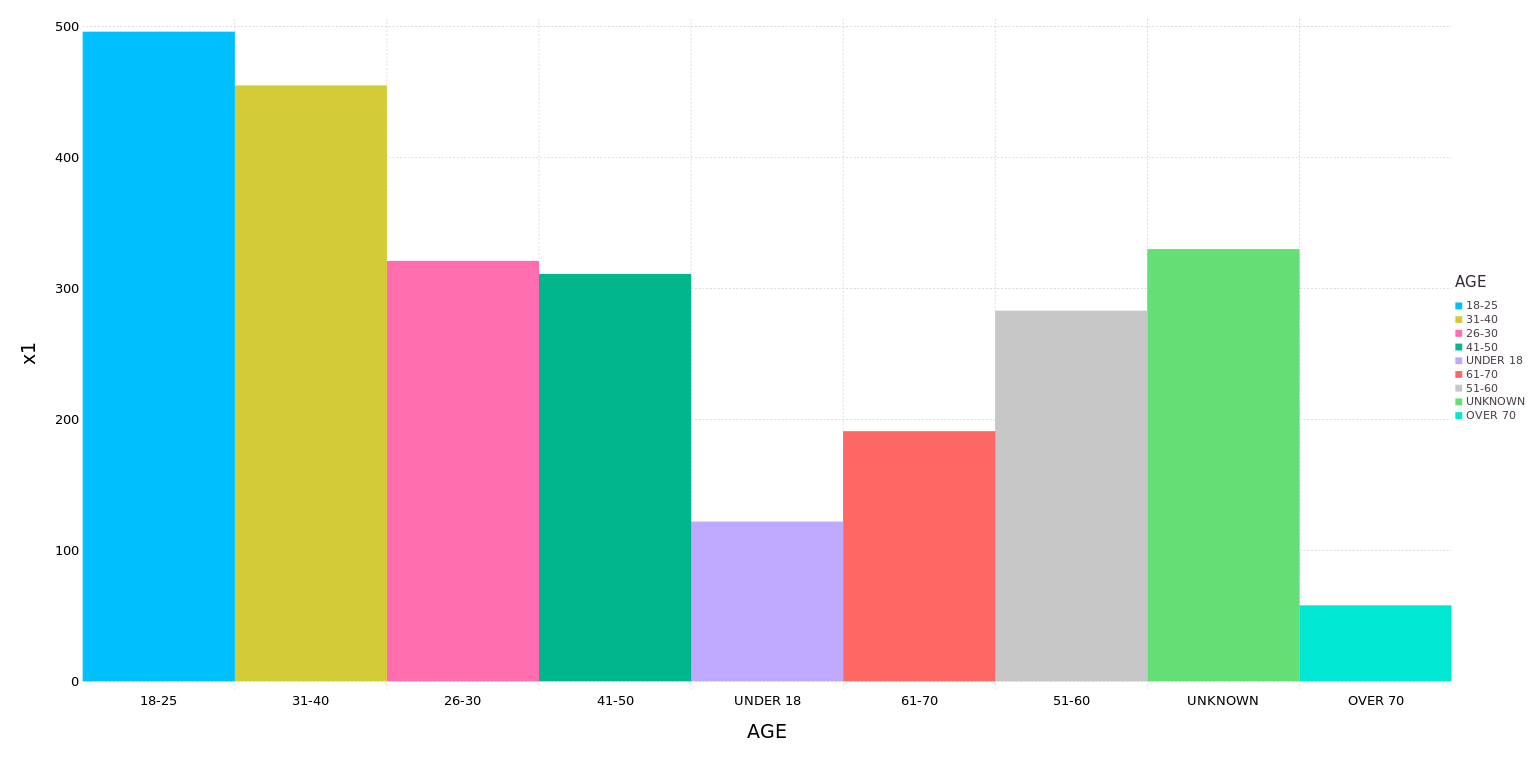

Observation: We can see that most crashes occur in younger age group between 18-25 and 26-30. We can also infer that as people age, their tendeny to crash decreses.

In [41]:
age_group_crash = by(data1, :AGE, nrow)
myplot = plot(age_group_crash, x="AGE", y ="x1", Geom.bar, color="AGE" ,white_panel )
draw(PNG(16inch, 8inch), myplot)
print("Observation: We can see that most crashes occur in younger age group between 18-25 and 26-30. We can also infer that as people age, their tendeny to crash decreses.")

**Step 17:** Use the following two lines of code to load the "iris" dataset:

using RDatasets

iris = dataset("datasets", "iris");

This dataset has information about flowers from three plant species.

Do:
1. List attributes in this data
2. Generate a scatter plot between "PetalLength" and "PetalWidth" where each point is colored based on "Sepecies". What observations can you make about the flowers from the three plant species based on this plot.

In [42]:
using RDatasets

iris = dataset("datasets", "iris");
names(iris)

5-element Array{Symbol,1}:
 :SepalLength
 :SepalWidth 
 :PetalLength
 :PetalWidth 
 :Species    

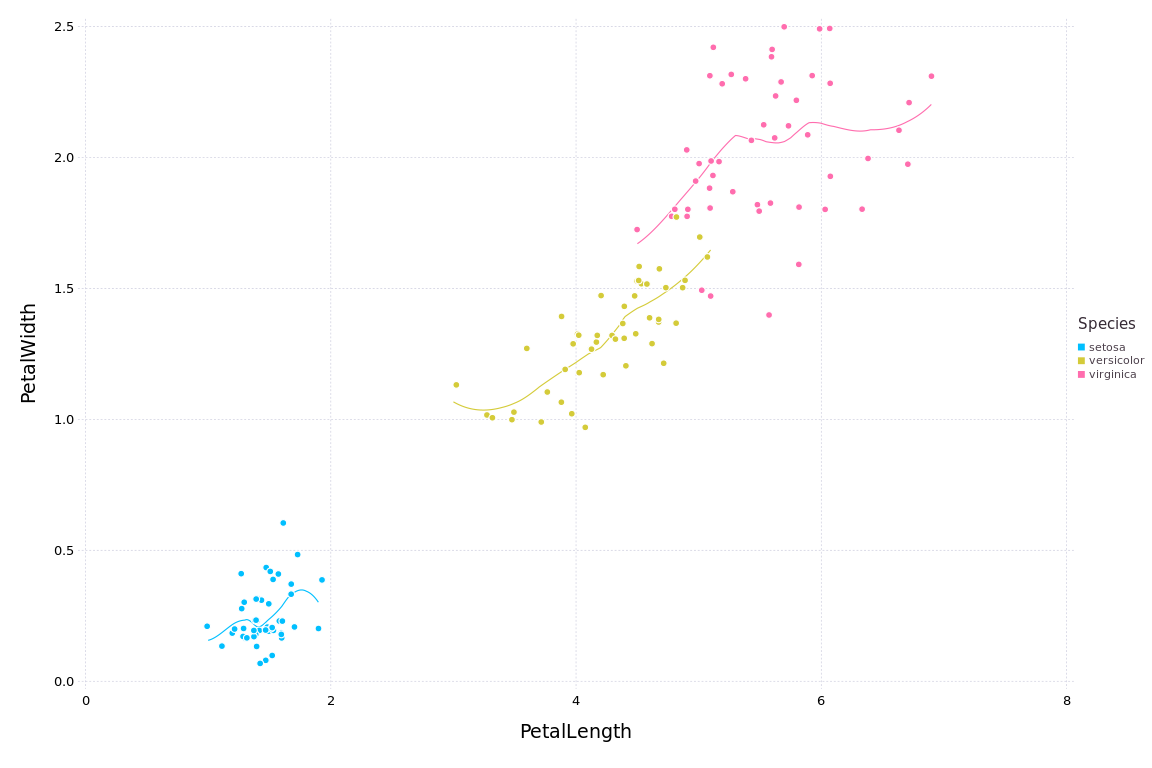

Observations: Each species can be classified by their petalwidth and petallength, i.e. viginica has petal width and petal length more than 1.5 and 4 respectively. This gives us a basic feature to classify different species based on their petallength and petalwidth.

In [44]:
myplot = plot(iris, x=:PetalLength, y=:PetalWidth, 
             Stat.x_jitter(range=0.7, seed=10),
             Stat.y_jitter(range=0.7, seed=20),
             Geom.point,Geom.smooth, color="Species", white_panel)
draw(PNG(12inch, 8inch), myplot)
print("Observations: Each species can be classified by their petalwidth and petallength, i.e. viginica has petal width and petal length more than 1.5 and 4 respectively. This gives us a basic feature to classify different species based on their petallength and petalwidth.")

**Step 18:** Using IRIS dataset draw a box plot to compare the SepalWidth for the three plant species. What observations can you make based on this plot?

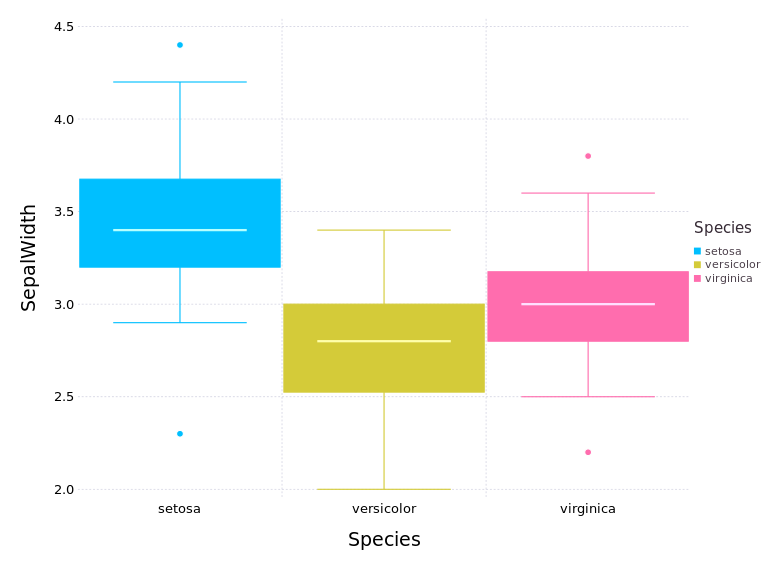

Observation: We can see that max sepalwidth of versicolor and virginica is almost equal to mean of setosa.

In [45]:
myplot = plot(iris, x="Species", y="SepalWidth",Geom.boxplot,color="Species", white_panel)
draw(PNG(8inch, 6inch), myplot)
print("Observation: We can see that max sepalwidth of versicolor and virginica is almost equal to mean of setosa.")

**Step 19:** Draw a violin plot for SepalWidth (similar to the box plot above) and state any new observations you may have.

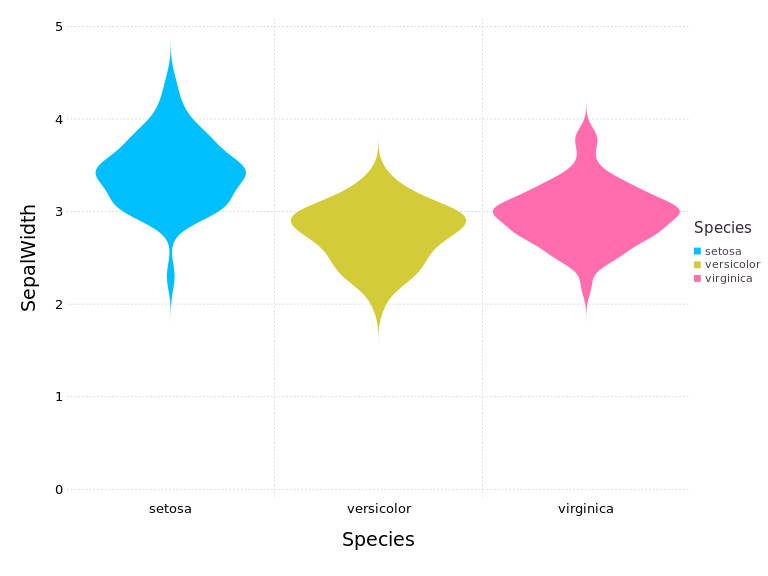

Observaation: mean density of versicolar < mean density of virginica < mean density of setosa 

In [46]:
myplot = plot(iris, x="Species", y="SepalWidth",Geom.violin, color="Species" ,white_panel)
draw(PNG(8inch, 6inch), myplot)
print("Observaation: mean density of versicolar < mean density of virginica < mean density of setosa ")